# Algoritmo KNN en Regresión

Vamos a trabajar con el dataset de paltas (*avocados*). Su descripción la pueden encontrar en https://www.kaggle.com/neuromusic/avocado-prices.

### 1. Carga de datos

a. Abrir el dataset (DataSets/Avocado.csv). Parsear fechas con la columna "Date".

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
palta = pd.read_csv('avocado.csv', delimiter=',', parse_dates=["Date"])
palta.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
# eliminamos la columna Unnamed
palta.drop('Unnamed: 0', axis = 1, inplace = True)
palta.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
palta.sort_values("Date", inplace = True) # ordena el dataset por la columna Date de menor a mayor
palta.reset_index(inplace = True, drop  = True)

In [ ]:
palta.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
1,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
3,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
4,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [ ]:
palta_chicago = palta[palta.region == 'Chicago'] # solo me quedo con los datos región=Chicago
palta_chicago.reset_index(inplace = True, drop = True)  # reseteo el índice
palta_chicago.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
1,2015-01-04,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago
2,2015-01-11,1.79,12915.74,1426.75,10900.10,0.00,588.89,588.89,0.00,0.00,organic,2015,Chicago
3,2015-01-11,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,conventional,2015,Chicago
4,2015-01-18,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,conventional,2015,Chicago


In [ ]:
import datetime as dt
palta_chicago['Date']=palta_chicago['Date'].map(dt.datetime.toordinal)
# datetime.toordinal() es un método simple que se usa para manipular los objetos de la clase DateTime.
# Devuelve el ordinal gregoriano proléptico de la fecha, donde el 1 de enero del año 1 tiene el ordinal 1.
# La función devuelve el valor ordinal para el objeto DateTime dado.
palta_chicago.head()

C:\Users\user\AppData\Local\Temp\ipykernel_4460\3698340451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  palta_chicago['Date']=palta_chicago['Date'].map(dt.datetime.toordinal)


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,735602,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
1,735602,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago
2,735609,1.79,12915.74,1426.75,10900.10,0.00,588.89,588.89,0.00,0.00,organic,2015,Chicago
3,735609,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,conventional,2015,Chicago
4,735616,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,conventional,2015,Chicago


In [ ]:
palta_chicago_convencional = palta_chicago[palta_chicago.type == 'conventional'] # solo me quedo con los datos
                                                                                 # type=conventional
palta_chicago_convencional.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1,735602,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago
3,735609,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,conventional,2015,Chicago
4,735616,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,conventional,2015,Chicago
6,735623,1.22,745439.17,26117.56,488218.44,145882.24,85220.93,75867.61,9265.81,87.51,conventional,2015,Chicago
8,735630,0.91,1133491.66,50783.91,824745.44,164884.41,93077.90,89516.93,3448.62,112.35,conventional,2015,Chicago


In [ ]:
X = palta_chicago_convencional.Date.values # solo me quedo con la columna "Date"
y = palta_chicago_convencional.AveragePrice.values # solo me quedo con la columna "AveragePrice"

In [ ]:
print(X.shape, y.shape)

(169,) (169,)


In [ ]:
X = X.reshape(-1,1) # necesito que X sea bidimensional
print(X.shape)

(169, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(118, 1)
(51, 1)
(118,)
(51,)


### 2. Algoritmo KNN
Entrenaremos un modelo de KNN de regresión, primero usando las mismas solo la variable **Date** y después agregando más. Por ejemplo, ¿qué pasa si agregamos la variable "type"?¿Cómo trabajan estos modelos con variables categóricas?

#### 2.1 Solo el predictor "Date"
En este primer caso: ¿Por qué no hace falta normalizar en este caso?

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors = 3
rgr_knn = KNeighborsRegressor(n_neighbors = n_neighbors)
rgr_knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

Calculamos MSE

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_pred_knn = rgr_knn.predict(X_train)
y_test_pred_knn = rgr_knn.predict(X_test)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred_knn))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred_knn))

Error en datos de train: 0.009396986817325802
Error en datos de test: 0.016421350762527237


Parece que funcionaría bien.

Grafiquemos las predicciones.

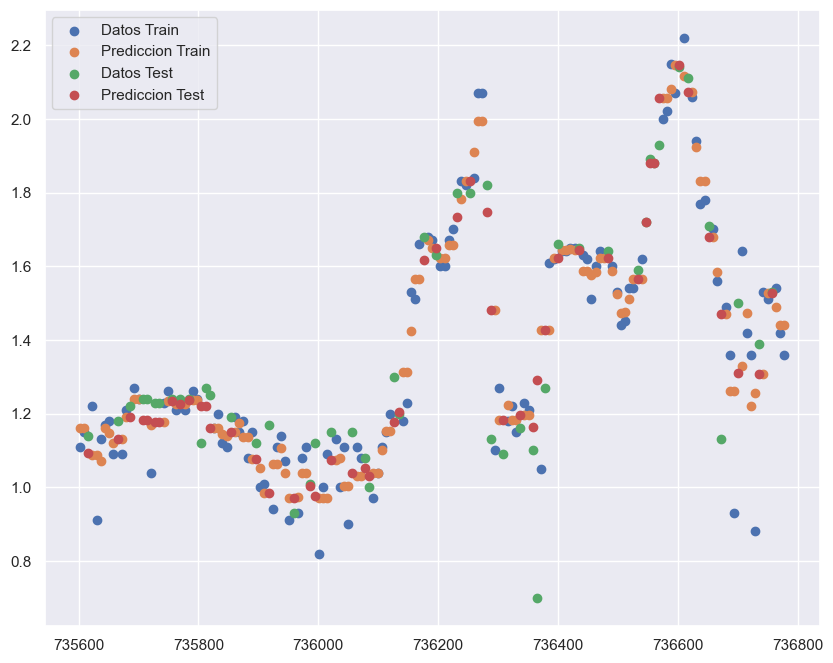

In [ ]:
plt.figure(figsize = (10,8))

plt.scatter(X_train, y_train, label = 'Datos Train')
plt.scatter(X_train, y_train_pred_knn, label = 'Prediccion Train')

plt.scatter(X_test, y_test, label = 'Datos Test')
plt.scatter(X_test, y_test_pred_knn, label = 'Prediccion Test')

plt.legend()
plt.show()

**Pregunta**:
1. Entrenamos y evaluamos el algolritmo KNN con k= 50 pero ¿Que valor de K será el óptimo? Hagamos el gráfico del error de entrenamiento y prueba.

In [ ]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
# k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40]
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40, 50, 70, 100]

# Generamos en loop sobre los distintos valores de k
for k in k_vecinos:

    # Vamos a repetir el siguiente bloque de código

    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors=k)

    # Entrenar el modelo
    clf.fit(X_train,y_train)

    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = mean_squared_error(y_train, y_train_pred)

    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = mean_squared_error(y_test, y_test_pred)

    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

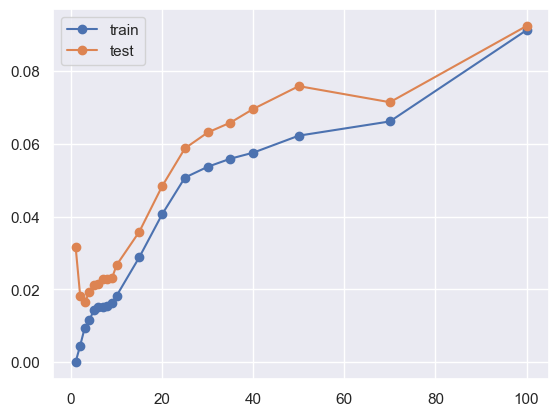

In [ ]:
import matplotlib.pyplot as plt

plt.plot(k_vecinos,lista_accuracy_train,'o-',label='train' )
plt.plot(k_vecinos,lista_accuracy_test,'o-',label='test')
plt.legend()

**Preguntas**:
1. ¿Qué valor de K es el óptimo? K = 3
2. Volver a realizar el gráfico con mas valores de *k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40, 50, 70, 100]* Para K = 100 los 2 errores tienden a un mismo valor ¿que significa eso? La predicción siempre es la misma, el valor promedio de todas las muestras (Underfitting).

In [ ]:
# volvemos a entrenar KNN con K= 3
from sklearn.neighbors import KNeighborsRegressor

n_neighbors = 3
rgr_knn = KNeighborsRegressor(n_neighbors = n_neighbors)
rgr_knn.fit(X_train,y_train)

y_train_pred_knn = rgr_knn.predict(X_train)
y_test_pred_knn = rgr_knn.predict(X_test)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred_knn))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred_knn))

Error en datos de train: 0.009396986817325802
Error en datos de test: 0.016421350762527237


Se mejoró bastante en el error de prueba (test).
#### 2.2 Agregar el predictor "Type"
Volvemos a entrenar el modelo de KNN de regresión, ahora agregando el predictor *type* y dejándolo de forma categórica.

In [ ]:
X = palta_chicago[['Date','type']].values
y = palta_chicago.AveragePrice.values
print(X.shape, y.shape)

(338, 2) (338,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(236, 2)
(102, 2)
(236,)
(102,)


In [ ]:
n_neighbors = 3
rgr_knn = KNeighborsRegressor(n_neighbors = n_neighbors, weights='uniform')
rgr_knn.fit(X_train,y_train)

ValueError: could not convert string to float: 'organic'

Verificamos que el algorítmo KNN no soporta predictores categóricos.
#### 2.2 Transformamos el predictor categórico "Type" en numérico

In [ ]:
palta_chicago.type = palta_chicago.type.map({'conventional': 0, 'organic': 1}) # hago un map con las opciones de Type
palta_chicago.head()

C:\Users\user\AppData\Local\Temp\ipykernel_12876\395394174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  palta_chicago.type = palta_chicago.type.map({'conventional': 0, 'organic': 1}) # hago un map con las opciones de Type


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,735602,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,1,2015,Chicago
1,735602,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,0,2015,Chicago
2,735609,1.79,12915.74,1426.75,10900.10,0.00,588.89,588.89,0.00,0.00,1,2015,Chicago
3,735609,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,0,2015,Chicago
4,735616,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,0,2015,Chicago


In [ ]:
X = palta_chicago[['Date','type']].values  # solo nos quedamos con los predictores Date y type
y = palta_chicago.AveragePrice.values
print(X.shape, y.shape)

(338, 2) (338,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(236, 2)
(102, 2)
(236,)
(102,)


In [ ]:
n_neighbors = 3
rgr_knn = KNeighborsRegressor(n_neighbors = n_neighbors, weights='uniform')
rgr_knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
y_train_pred_knn = rgr_knn.predict(X_train)
y_test_pred_knn = rgr_knn.predict(X_test)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred_knn))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred_knn))

Error en datos de train: 0.03230414312617703
Error en datos de test: 0.05573464052287583


El error de prueba empeoró. Probemos estandarizando los 2 predictores:

In [ ]:
from sklearn.preprocessing import StandardScaler  # ahora estandarizo por tengo dos predictores
scaler = StandardScaler()
scaler.fit(X_train);

In [ ]:
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

In [ ]:
n_neighbors = 3
rgr_knn = KNeighborsRegressor(n_neighbors = n_neighbors, weights='uniform')
rgr_knn.fit(X_train_scal,y_train)

KNeighborsRegressor(n_neighbors=3)

Calculamos MSE

In [ ]:
y_train_pred_knn = rgr_knn.predict(X_train_scal)
y_test_pred_knn = rgr_knn.predict(X_test_scal)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred_knn))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred_knn))

Error en datos de train: 0.007775047080979283
Error en datos de test: 0.017006100217864917


Veamos que estandarizando los predictores, el algoritmo KNN funciona mejor.
Y graficamos.

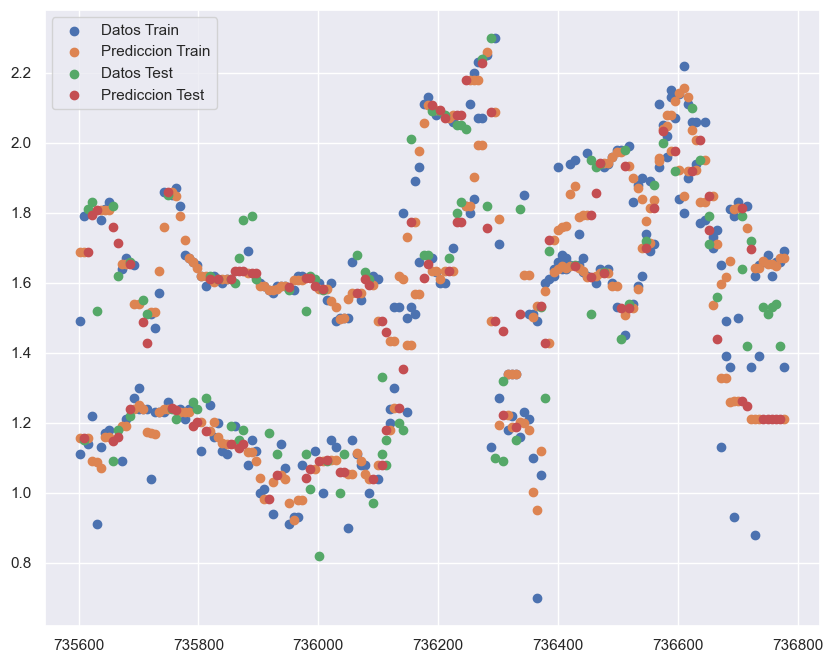

In [ ]:
plt.figure(figsize = (10,8))

plt.scatter(X_train[:,0], y_train, label = 'Datos Train') # X_train[:,0] solo nos quedamos con todas las filas y columna 0
plt.scatter(X_train[:,0], y_train_pred_knn, label = 'Prediccion Train')

plt.scatter(X_test[:,0], y_test, label = 'Datos Test')
plt.scatter(X_test[:,0], y_test_pred_knn, label = 'Prediccion Test')

plt.legend()
plt.show()

#### 2.3 Utilicemos todos los predictores sin estandarizar

In [ ]:
palta_full = palta_chicago[['Date','AveragePrice','Total Volume','Total Bags','Small Bags',
                             'Large Bags','XLarge Bags','type']]

In [ ]:
palta_full

,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,735602,1.49,17723.17,905.55,905.55,0.00,0.00,1
1,735602,1.11,783068.03,77539.48,72888.46,4651.02,0.00,0
2,735609,1.79,12915.74,588.89,588.89,0.00,0.00,1
3,735609,1.15,802874.94,79298.64,74716.43,4539.25,42.96,0
4,735616,1.14,797741.43,98865.72,95516.44,3311.71,37.57,0
...,...,...,...,...,...,...,...,...
333,736764,1.54,830421.03,138773.96,100438.58,37184.96,1150.42,0
334,736771,1.66,35542.17,8401.90,8398.57,3.33,0.00,1
335,736771,1.42,841171.24,146284.18,110035.76,34764.91,1483.51,0
336,736778,1.69,35088.36,7213.20,7176.54,36.66,0.00,1


In [ ]:
# Separamos Predictores y la salida
X = palta_full[['Date','AveragePrice','Total Volume','Total Bags','Small Bags',
                             'Large Bags','XLarge Bags','Date','type']].values
y = palta_full.AveragePrice.values
print(X.shape, y.shape)

(338, 9) (338,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(236, 9)
(102, 9)
(236,)
(102,)


In [ ]:
n_neighbors = 3
rgr_knn = KNeighborsRegressor(n_neighbors = n_neighbors, weights='uniform')
rgr_knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
y_train_pred_knn = rgr_knn.predict(X_train)
y_test_pred_knn = rgr_knn.predict(X_test)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred_knn))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred_knn))

Error en datos de train: 0.025047645951035778
Error en datos de test: 0.07295555555555554


Y ahora probamos estandarizando todos los predictores

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train);

In [ ]:
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

In [ ]:
n_neighbors = 3
rgr_knn = KNeighborsRegressor(n_neighbors = n_neighbors, weights='uniform')
rgr_knn.fit(X_train_scal,y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
y_train_pred_knn = rgr_knn.predict(X_train_scal)
y_test_pred_knn = rgr_knn.predict(X_test_scal)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred_knn))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred_knn))

Error en datos de train: 0.002758003766478343
Error en datos de test: 0.00364106753812636


**Conclusión**:
1. Con todos los predictores estandarizados, obtenemos el mejor modelo KNN  

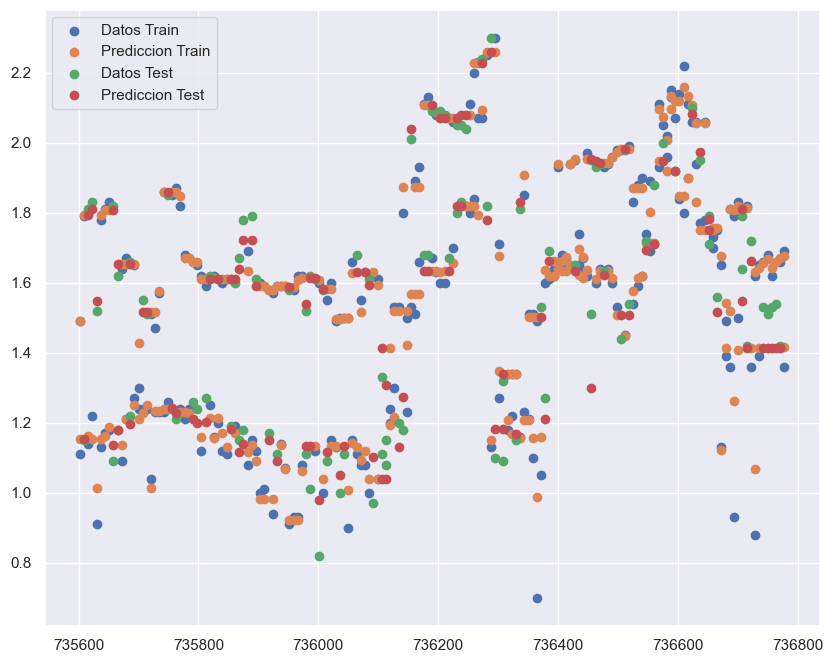

In [ ]:
plt.figure(figsize = (10,8))

plt.scatter(X_train[:,0], y_train, label = 'Datos Train') # X_train[:,0] solo nos quedamos con todas las filas y columna 0
plt.scatter(X_train[:,0], y_train_pred_knn, label = 'Prediccion Train')

plt.scatter(X_test[:,0], y_test, label = 'Datos Test')
plt.scatter(X_test[:,0], y_test_pred_knn, label = 'Prediccion Test')

plt.legend()
plt.show()